Here is a notebook that you can upload to colab to train your model. 

### Instructions
Before training you will need to upload:
```
hw1_train_dataset.zip
hw1_test_dataset.zip
observation_model.py
```

In [140]:
# You can change this supervision_mode between 'phi' and 'xy'. See the assinment pdf for more details.
supervision_mode = 'xy'

In [141]:
# imports
import math
import zipfile
import os
from io import BytesIO

import matplotlib.pyplot as plt

import IPython.display

from tqdm.notebook import tqdm

import PIL

import numpy as np

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [142]:
# Upload observation_model.py from your assignment folder before running this
# run this each time you want to reload the observation_model code
import observation_model
import importlib
import observation_model
importlib.reload(observation_model)

<module 'observation_model' from 'c:\\study\\Spring24\\CSE571\\assignment\\hw1\\cse571_24sp_hw1\\observation_model.py'>

## Helper functions:

In [143]:
# minimized angle function from utils
def minimized_angle(angle):
    """Normalize an angle to [-pi, pi]."""
    while angle < -np.pi:
        angle += 2 * np.pi
    while angle >= np.pi:
        angle -= 2 * np.pi
    return angle

In [144]:
# function for displaying images
def display_array(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [145]:
# visualization functions
def phi_to_i_x(phi):
    c = np.cos(phi)
    s = np.sin(phi)
    if np.abs(c) > np.abs(s):
        x = -s/c
        if c > 0.:
            i = 1
        else:
            i = 3
    else:
        x = c/s
        if s > 0.:
            i = 0
        else:
            i = 2
    x = int(np.floor((x-0.0000001)*16)+16)
    return i, x
    
def make_visualization(image, labels, phis):
    quadrants = [np.full((16, 32, 3), 255, dtype=np.uint8) for _ in range(4)]
    colors = [
            [230,   0,   0],
            [  0, 230,   0],
            [  0, 0.0, 230],
            [128, 128, 0.0],
            [0.0, 128, 128],
            [128, 0.0, 128],
    ]
    for la, color in zip(labels, colors):
        i, x = phi_to_i_x(la)
        quadrants[i][:8,x] = color
    for th, color in zip(phis, colors):
        i, x = phi_to_i_x(th)
        quadrants[i][8:,x] = color
    strip = np.concatenate(quadrants, axis=1)
    strip = np.concatenate([strip[:,-16:], strip[:,:-16]], axis=1)
    
    return np.concatenate([image, strip], axis=0)

## Dataset and Dataloader:

A custom Dataset class is implemented to fetch the data and labels. To do this we must implement three functions: __init__, __len__, and __getitem__. This has been done for you but check out this [link](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) to learn more about creating your own datasets. 

In [146]:
class CarDataset(Dataset):
    '''
    Returns:
        images as 32x128x3 numpy arrays
        labels as 6 numpy arrays
    '''
    def __init__(self, path, subset=None):
        self.zip = zipfile.ZipFile(path)
        files = self.zip.namelist()
        self.images = sorted([f for f in files if f.endswith('.png')])
        self.labels = sorted([f for f in files if f.endswith('.npy')])
        if subset is not None:
            self.images = self.images[:subset]
            self.labels = self.labels[:subset]

    def __getitem__(self, i):
        image = np.array(PIL.Image.open(self.zip.open(self.images[i])))
        label = np.load(self.zip.open(self.labels[i]))
        return image, label

    def __len__(self):
        return len(self.images)

In [147]:
# Load and preprocess the data into appropriate formats and split it into training, validation and testing sets.
batch_size = 64
train_dataset = CarDataset('hw1_train_dataset.zip')
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CarDataset('hw1_test_dataset.zip')
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Model and Optimizer:

The model is being imported from the observation_model.py. In order to change your model architecture edit the observation_model.py. We have already implemented a basic neural network for you. 

We will be using the adam optimizer to update the weights of the model during training to minimize the loss. Click on the [link](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam) to learn more about the optimizer.

In [97]:
torch.cuda.is_available()

True

In [148]:
# build the model and optimizer
if supervision_mode == 'phi':
    output_channels = 6
elif supervision_mode == 'xy':
    output_channels = 12
model = observation_model.ObservationModel(output_channels).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

## Training loop

Epoch: 1
Training


  0%|          | 0/157 [00:00<?, ?it/s]

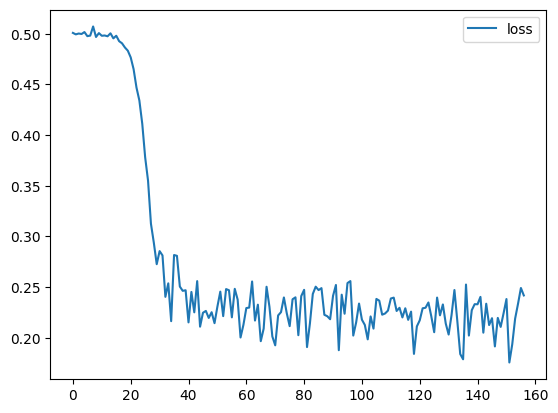

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\titan\AppData\Local\Temp\ipykernel_26956\3577541593.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = int(np.floor((x-0.0000001)*16)+16)


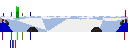

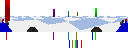

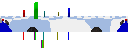

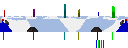

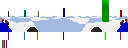

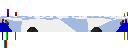

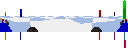

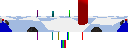

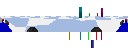

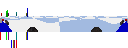

Error Mean: 0.641689
Error Std: 0.569788
Saving Checkpoint
Epoch: 2
Training


  0%|          | 0/157 [00:00<?, ?it/s]

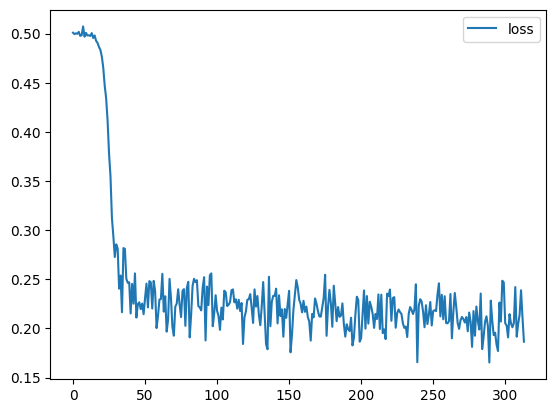

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

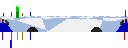

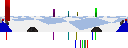

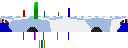

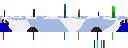

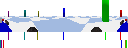

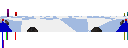

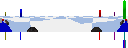

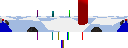

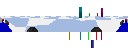

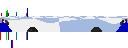

Error Mean: 0.633245
Error Std: 0.562386
Saving Checkpoint
Epoch: 3
Training


  0%|          | 0/157 [00:00<?, ?it/s]

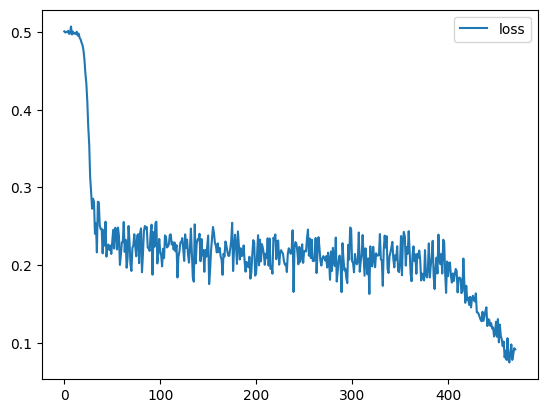

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

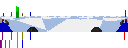

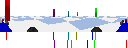

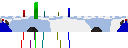

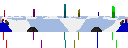

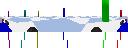

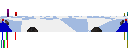

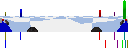

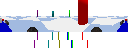

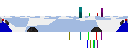

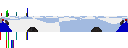

Error Mean: 0.299731
Error Std: 0.279843
Saving Checkpoint
Epoch: 4
Training


  0%|          | 0/157 [00:00<?, ?it/s]

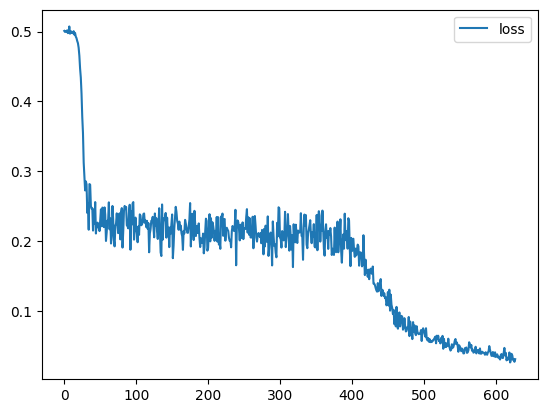

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

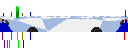

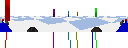

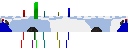

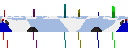

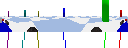

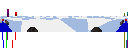

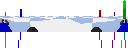

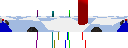

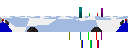

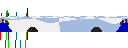

Error Mean: 0.161299
Error Std: 0.163041
Saving Checkpoint
Epoch: 5
Training


  0%|          | 0/157 [00:00<?, ?it/s]

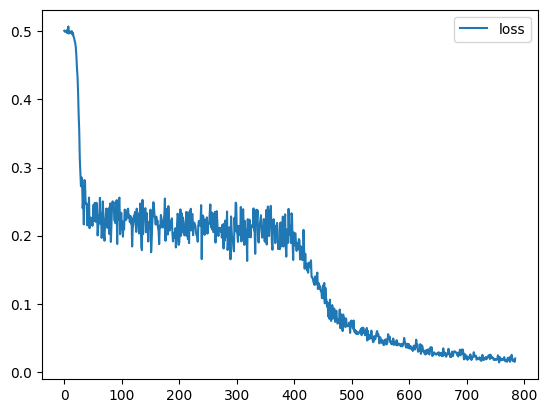

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

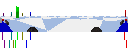

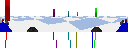

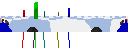

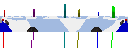

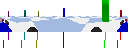

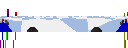

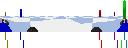

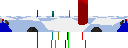

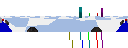

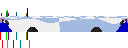

Error Mean: 0.118130
Error Std: 0.121870
Saving Checkpoint
Epoch: 6
Training


  0%|          | 0/157 [00:00<?, ?it/s]

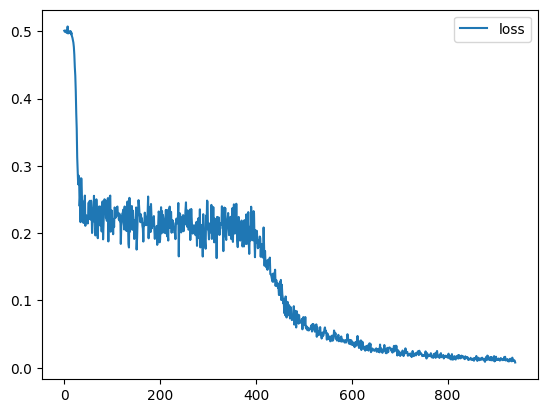

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

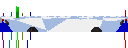

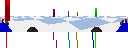

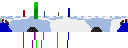

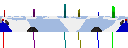

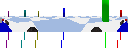

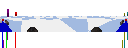

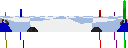

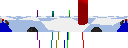

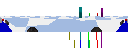

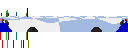

Error Mean: 0.088155
Error Std: 0.099449
Saving Checkpoint
Epoch: 7
Training


  0%|          | 0/157 [00:00<?, ?it/s]

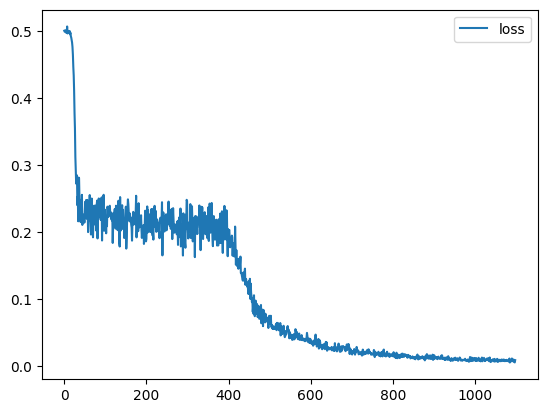

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

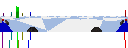

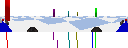

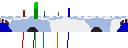

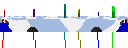

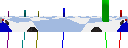

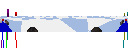

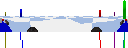

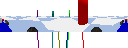

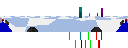

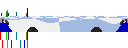

Error Mean: 0.077874
Error Std: 0.090731
Saving Checkpoint
Epoch: 8
Training


  0%|          | 0/157 [00:00<?, ?it/s]

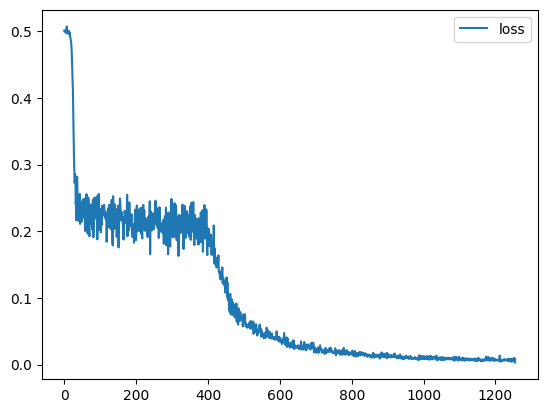

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

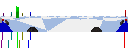

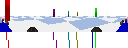

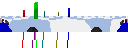

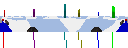

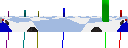

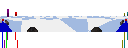

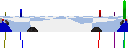

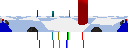

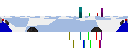

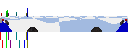

Error Mean: 0.072503
Error Std: 0.085420
Saving Checkpoint
Epoch: 9
Training


  0%|          | 0/157 [00:00<?, ?it/s]

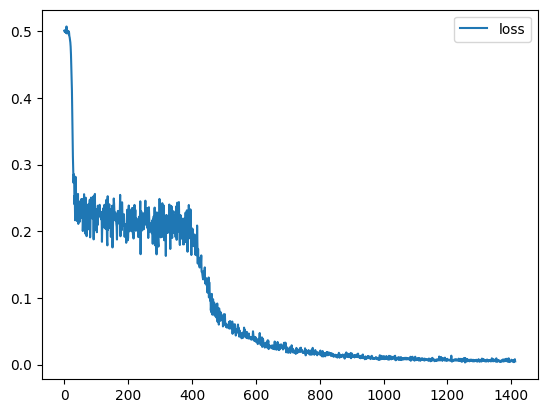

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

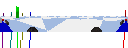

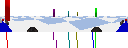

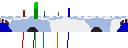

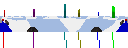

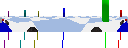

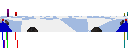

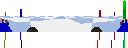

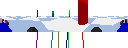

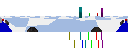

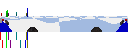

Error Mean: 0.064533
Error Std: 0.079358
Saving Checkpoint
Epoch: 10
Training


  0%|          | 0/157 [00:00<?, ?it/s]

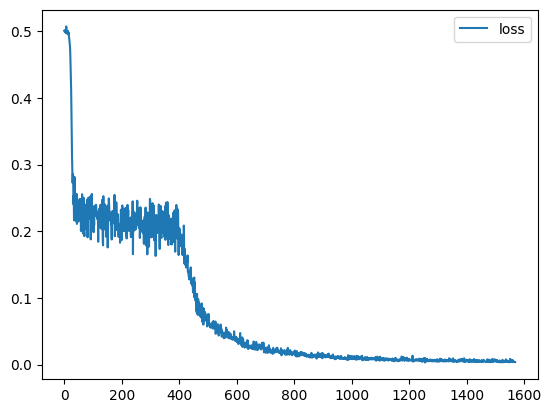

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

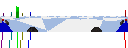

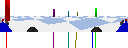

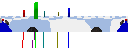

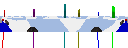

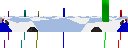

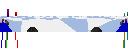

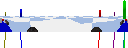

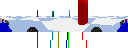

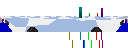

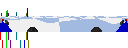

Error Mean: 0.060138
Error Std: 0.076567
Saving Checkpoint
Epoch: 11
Training


  0%|          | 0/157 [00:00<?, ?it/s]

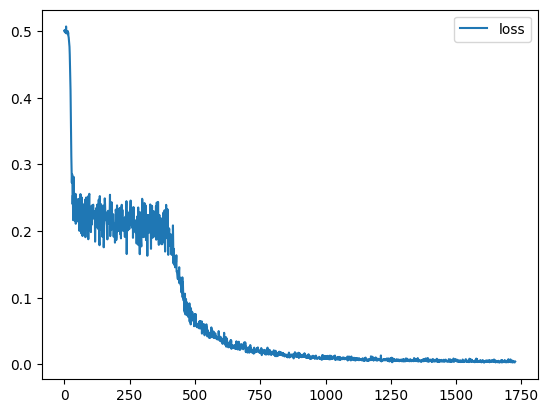

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

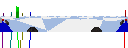

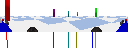

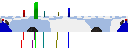

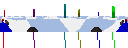

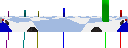

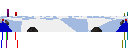

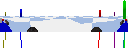

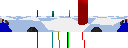

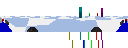

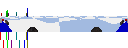

Error Mean: 0.055177
Error Std: 0.072490
Saving Checkpoint
Epoch: 12
Training


  0%|          | 0/157 [00:00<?, ?it/s]

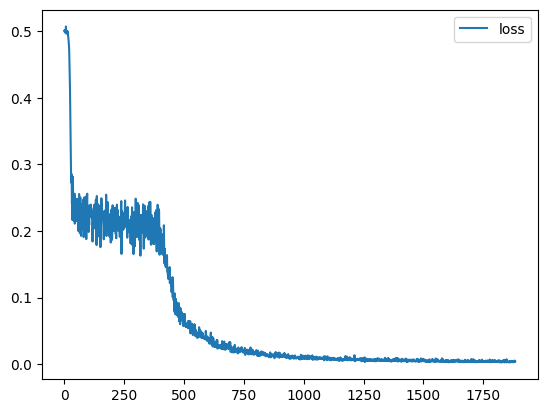

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

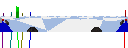

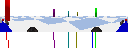

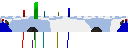

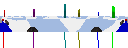

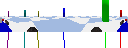

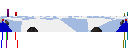

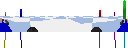

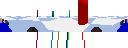

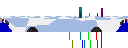

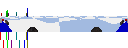

Error Mean: 0.053784
Error Std: 0.072480
Saving Checkpoint
Epoch: 13
Training


  0%|          | 0/157 [00:00<?, ?it/s]

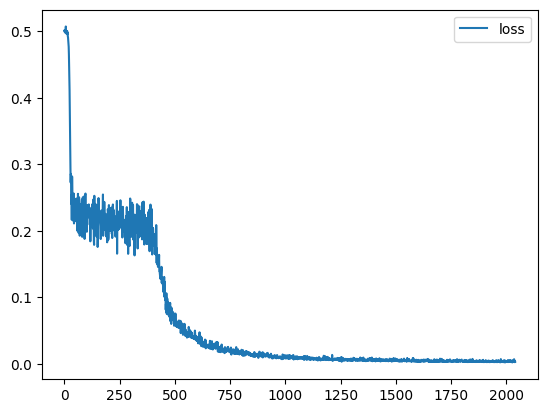

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

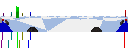

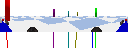

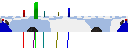

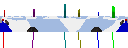

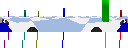

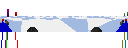

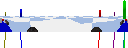

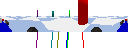

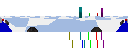

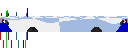

Error Mean: 0.053319
Error Std: 0.069292
Saving Checkpoint
Epoch: 14
Training


  0%|          | 0/157 [00:00<?, ?it/s]

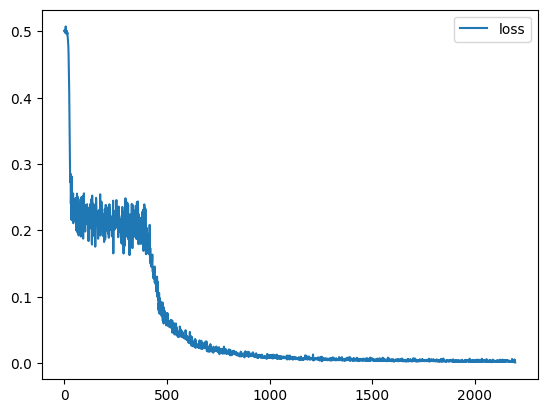

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

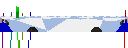

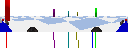

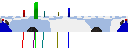

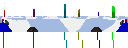

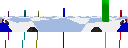

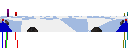

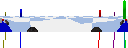

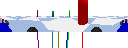

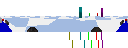

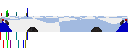

Error Mean: 0.049657
Error Std: 0.070102
Saving Checkpoint
Epoch: 15
Training


  0%|          | 0/157 [00:00<?, ?it/s]

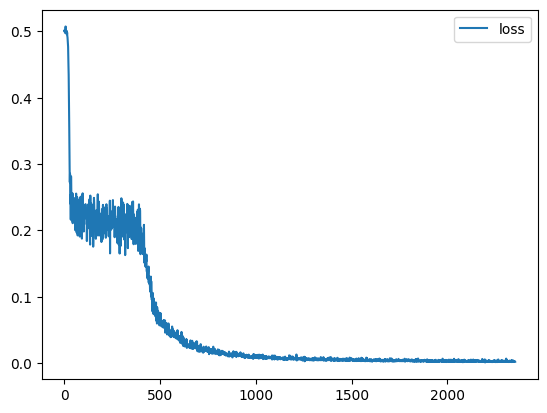

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

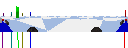

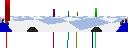

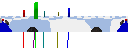

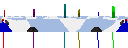

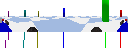

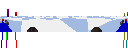

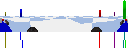

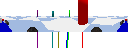

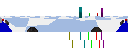

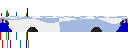

Error Mean: 0.048093
Error Std: 0.069382
Saving Checkpoint
Epoch: 16
Training


  0%|          | 0/157 [00:00<?, ?it/s]

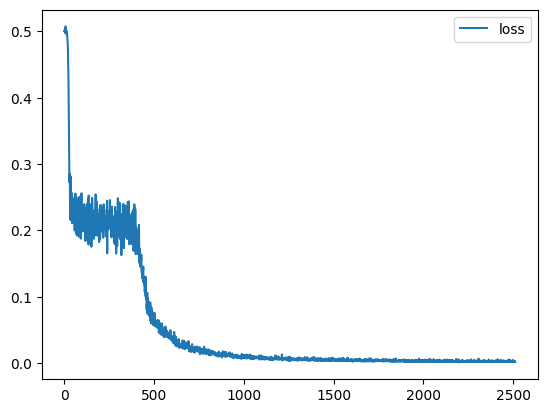

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

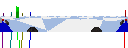

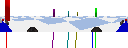

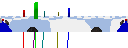

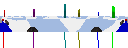

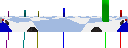

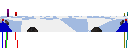

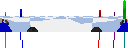

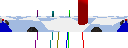

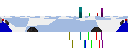

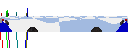

Error Mean: 0.048499
Error Std: 0.067213
Saving Checkpoint
Epoch: 17
Training


  0%|          | 0/157 [00:00<?, ?it/s]

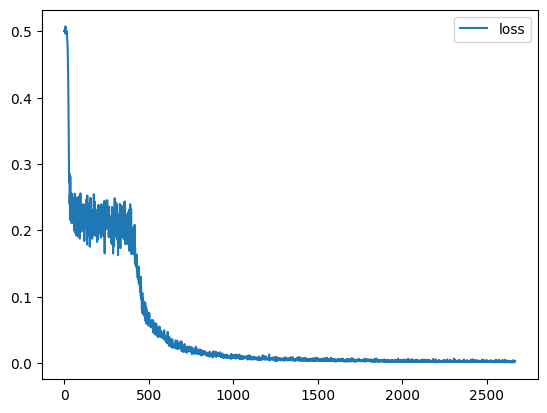

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

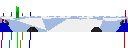

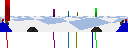

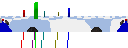

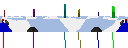

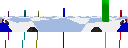

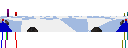

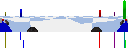

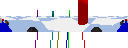

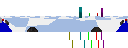

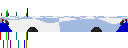

Error Mean: 0.046037
Error Std: 0.064170
Saving Checkpoint
Epoch: 18
Training


  0%|          | 0/157 [00:00<?, ?it/s]

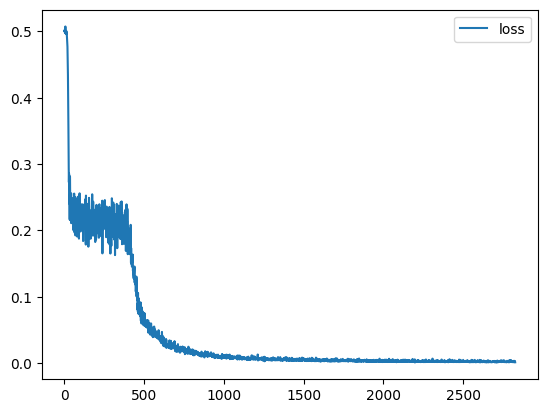

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

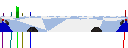

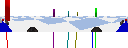

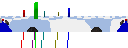

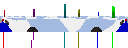

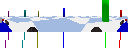

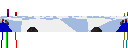

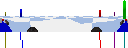

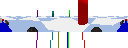

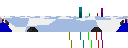

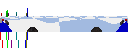

Error Mean: 0.047310
Error Std: 0.068295
Saving Checkpoint
Epoch: 19
Training


  0%|          | 0/157 [00:00<?, ?it/s]

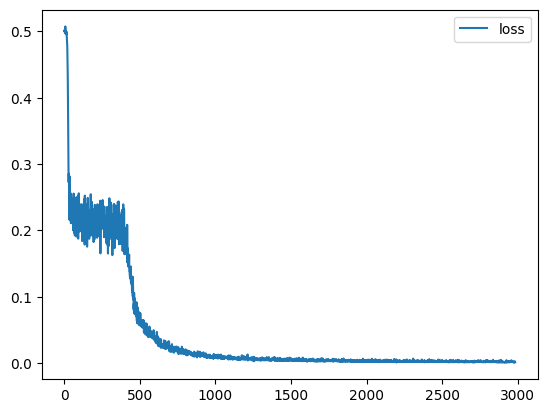

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

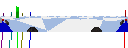

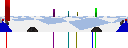

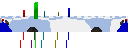

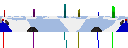

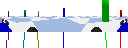

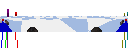

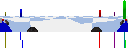

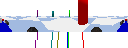

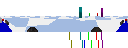

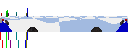

Error Mean: 0.042467
Error Std: 0.064921
Saving Checkpoint
Epoch: 20
Training


  0%|          | 0/157 [00:00<?, ?it/s]

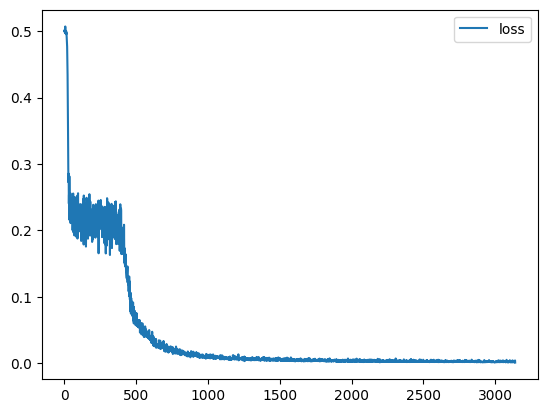

Evaluating


  0%|          | 0/16 [00:00<?, ?it/s]

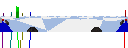

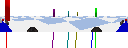

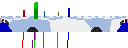

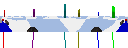

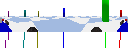

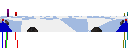

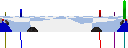

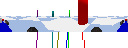

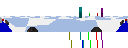

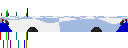

Error Mean: 0.041819
Error Std: 0.061829
Saving Checkpoint


In [149]:
num_epochs = 20
losses = []
# Loop over the training data and for each iteration perform the following steps:
for epoch in range(1, num_epochs+1):
    print('Epoch: %i'%epoch)
    print('Training')
    # This tells your model that you are training the model. This helps inform layers such as Dropout and BatchNorm,
    # which are designed to behave differently during training and evaluation.
    model.train()
    iterate = tqdm(train_loader)
    for x, y in iterate:
        # Move to cuda, normalize the image between 0 and 1 and
        # change the ordering to b,c,h,w
        x = (x.float().cuda() / 255.).permute(0,3,1,2)
        b = x.shape[0]
        y = y.float().view(b,6).cuda()

        # Pass the input through the model and get the predicted output.
        x = model(x)

        if supervision_mode == 'phi':
            assert x.shape[1] == 6
        elif supervision_mode == 'xy':
            y = torch.cat([torch.cos(y), torch.sin(y)], dim=1)
            assert x.shape[1] == 12
        else:
            raise ValueError('Unknown supervision_mode: %s'%supervision_mode)

        # Define a loss function that measures the difference between the predicted and actual output of the network.
        loss = F.mse_loss(x,y)

        # Calculate the gradients of the loss with respect to the model parameters using backpropagation and 
        # Update the model parameters using the optimizer.
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Save the losses to further analysis
        losses.append(float(loss))
        recent_losses = losses[-100:]
        running_loss = sum(recent_losses)/len(recent_losses)
        iterate.set_description('Loss: %.04f'%running_loss)

    # Plot the losses
    plt.plot(np.arange(len(losses)), losses, label='loss')
    plt.legend()
    plt.show()


    # Following is the testing loop used to evaluate the final performance of the model on the testing set after training is complete.
    print('Evaluating')
    all_errors = []
    model.eval()
    # the gradiants are only required for backprop and we do not need to calculate it during eval.
    with torch.no_grad():
        for i, (image, label) in enumerate(tqdm(test_loader)):
            # Move to cuda, normalize the image between 0 and 1 and
            # change the ordering to b,c,h,w
            x = image.float().cuda() / 255.
            x = x.permute(0,3,1,2)
            b = x.shape[0]
            y = label.float().view(b,6).cuda()

            # Pass the input through the model and get the predicted output.
            x = model(x)
            if supervision_mode == 'phi':
                phi = x
            elif supervision_mode == 'xy':
                phi = torch.atan2(x[:,6:], x[:,:6])
            else:
                raise ValueError('Unknown supervision_mode: %s'%supervision_mode)

            # Calculate the error metric
            error = (phi-y).view(-1).cpu().numpy()
            error = [abs(minimized_angle(float(e))) for e in error]
            all_errors.extend(error)
            if i == 0:
                for im, la, ph in zip(image[:10], label[:10], phi[:10]):
                    la = la.detach().cpu().numpy()
                    ph = ph.detach().cpu().numpy()
                    vis = make_visualization(im, la, ph)
                    display_array(vis)
    
    # Calculate the average error.
    error_mean = np.mean(all_errors)
    error_std = np.std(all_errors)
    print('Error Mean: %f'%float(error_mean))
    print('Error Std: %f'%float(error_std))
    
    # Save the final trained model so that it can be used for making predictions on new data.
    print('Saving Checkpoint')
    state_dict = model.state_dict()
    torch.save(state_dict, 'checkpoint.pt')
